In [2]:
from src.evaluate_tools import plot_confusion_matrix_by_cm
import numpy as np
%matplotlib inline

Using TensorFlow backend.



 CONFUSION MATRIX
[[0.93  0.05  0.02 ]
 [0.03  0.96  0.01 ]
 [0.005 0.015 0.98 ]]


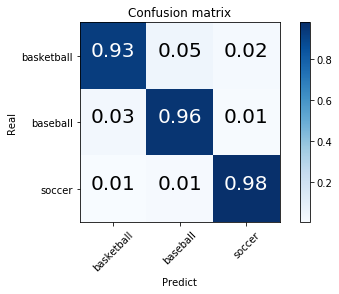

In [2]:
cnn_cm=np.array([
    [0.97,0.02,0.01],
    [0.12,0.87,0.01],
    [0.,0.02,0.98]
])
plot_confusion_matrix_by_cm(cnn_cm,["basketball","baseball","soccer"],filename="LR")


 CONFUSION MATRIX
[[0.97       0.02       0.01      ]
 [0.12121212 0.87878788 0.        ]
 [0.         0.02       0.98      ]]


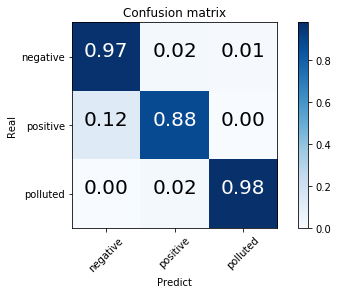

In [5]:
transfer_cm=np.array([
    [0.97,0.02,0.01],
    [0.12,0.87,0.],
    [0.,0.02,0.98]
])
plot_confusion_matrix_by_cm(transfer_cm,["negative","positive","polluted"],filename="VGG")